# Random Forest Classification with Scikit-Learn

This notebook demonstrates classification using the RandomForestClassifier from scikit-learn on the Adult Income dataset.

## 1. Introduction
We will build, train, and evaluate a Random Forest model to predict whether an individual's income exceeds $50K annually.

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 3. Load and Prepare Data

In [2]:
# Load Adult Income dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    names=column_names, na_values=' ?')
data = data.dropna()

# Encode categorical variables
X = pd.get_dummies(data.drop('income', axis=1), drop_first=True)
y = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale numeric features
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 4. Train Random Forest Model

In [3]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## 5. Evaluate Model

In [4]:
y_pred = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6797
           1       0.80      0.54      0.64      2252

    accuracy                           0.85      9049
   macro avg       0.83      0.75      0.77      9049
weighted avg       0.85      0.85      0.84      9049


Confusion Matrix:
[[6499  298]
 [1044 1208]]


## 6. Feature Importance

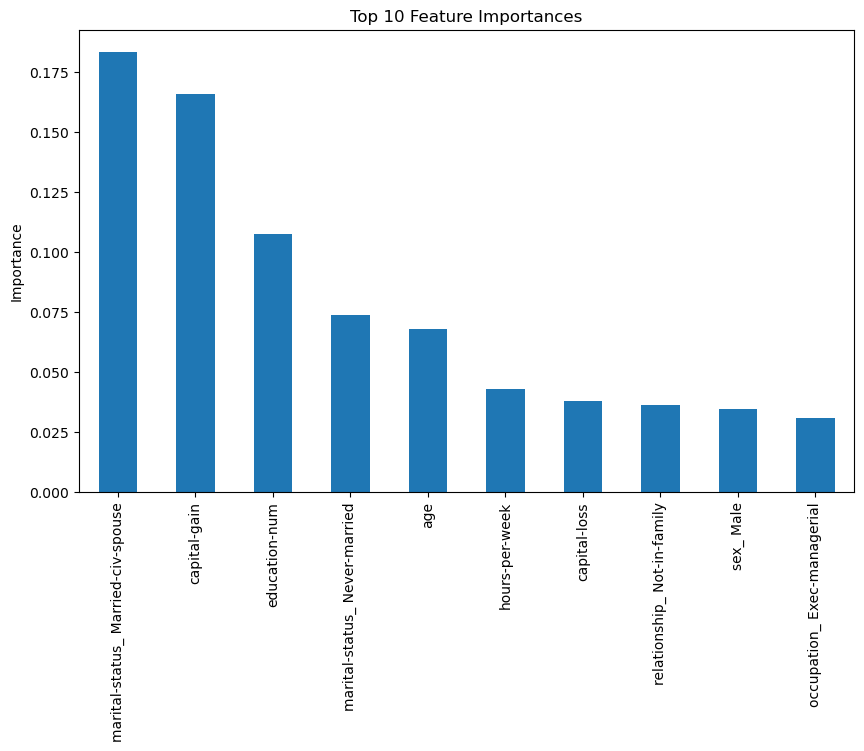

In [5]:
# Plot top 10 feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)
plt.figure(figsize=(10,6))
top_features.plot(kind='bar')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

## 7. Conclusion
The Random Forest model yields strong performance on the Adult Income dataset. Tune `n_estimators`, `max_depth`, and other hyperparameters for further gains.